In [1]:
!python -m pip install hdf5plugin
!pip install --upgrade Pylians==0.10  # 0.10 is necessary, 0.11 will give error.

import h5py
import hdf5plugin
import gzip

In [2]:
import os
import numpy as np
import readgadget
import MAS_library as MASL

import matplotlib.pyplot as plt

In [3]:
# CONSTANTS
NUM_SIMS = 1000  # Can be any integer <= 2000.
BASE_PATH = '/home/jovyan/data/Snapshots/latin_hypercube'
OUTPUT_DIR = '/home/jovyan/my_outputs/'

if not os.path.exists(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)

grid     = 64    #the density field will have grid^3 voxels
MAS      = 'CIC'  #Mass-assignment scheme:'NGP', 'CIC', 'TSC', 'PCS'
verbose  = True   #whether to print information about the progress
ptype    = [1]    #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)

In [4]:
bad_flags = []  # For storing simulation numbers having empty voxels in the density field.

for i in range(NUM_SIMS):
    snapshot = os.path.join(BASE_PATH, f'{i}', 'snapdir_004', 'snap_004')
    cosmo_params = np.loadtxt(
        os.path.join(BASE_PATH, f'{i}', 'Cosmo_params.dat')
    )

    header   = readgadget.header(snapshot)
    BoxSize  = header.boxsize/1e3  #Mpc/h
    redshift = header.redshift     #redshift of the snapshot
    Masses   = header.massarr*1e10 #Masses of the particles in Msun/h

    # Read positions, velocities and IDs of the particles
    pos = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h

    delta = np.zeros((grid,grid,grid), dtype=np.float32)

    # Construct 3D density field
    MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)

    # We want the effective no. of particles in each voxel, so skip the below code.
#     delta *= Masses[1]

    if np.any(delta == 0.0):
        print('Density field contains at least one empty voxel!')
        bad_flags.append(1)
    else:
        bad_flags.append(0)

    filename = os.path.join(OUTPUT_DIR, f'sim{i}_LH_z0_grid{grid}_mas{MAS}.h5')
    h5f = h5py.File(filename, 'w')
    dataset = h5f.create_dataset('3D_density_field', data=delta, compression='gzip')
    dataset.attrs['cosmo_params'] = cosmo_params  # Order of storing parameters is same as Cosmo_params.dat
    h5f.close()


Using CIC mass assignment scheme
Time taken = 3.226 seconds


Using CIC mass assignment scheme
Time taken = 3.187 seconds


Using CIC mass assignment scheme
Time taken = 3.195 seconds


Using CIC mass assignment scheme
Time taken = 3.197 seconds


Using CIC mass assignment scheme
Time taken = 3.185 seconds


Using CIC mass assignment scheme
Time taken = 3.197 seconds


Using CIC mass assignment scheme
Time taken = 3.188 seconds


Using CIC mass assignment scheme
Time taken = 3.192 seconds


Using CIC mass assignment scheme
Time taken = 3.199 seconds


Using CIC mass assignment scheme
Time taken = 3.201 seconds


Using CIC mass assignment scheme
Time taken = 3.172 seconds


Using CIC mass assignment scheme
Time taken = 3.189 seconds


Using CIC mass assignment scheme
Time taken = 3.182 seconds


Using CIC mass assignment scheme
Time taken = 3.176 seconds


Using CIC mass assignment scheme
Time taken = 3.165 seconds


Using CIC mass assignment scheme
Time taken = 3.170 seconds


Using C

In [5]:
!tar -czf density_fields_3D_LH_z0_grid64_masCIC.tar.gz my_outputs

In [6]:
!ls -lh density_fields_3D_LH_z0_grid64_masCIC.tar.gz

-rw-r--r-- 1 jovyan jovyan 888M Oct  6 09:09 density_fields_3D_LH_z0_grid64_masCIC.tar.gz


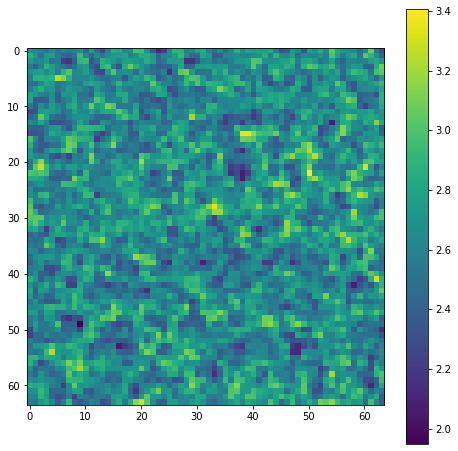

In [7]:
plt.figure(figsize=(8, 8)); plt.imshow(np.log10(delta[:,:,0])); plt.colorbar()

In [8]:
print(np.any(bad_flags == 1))

False
